# 📊 Simulación de Estimadores de Regresión Lineal

Este notebook demuestra el cálculo de estimadores de mínimos cuadrados ordinarios (MCO) para regresión lineal simple y múltiple usando ejemplos simulados.

## Contenido:
1. Regresión Lineal Simple
2. Regresión Lineal Múltiple (Dos Regresores)
3. Comparación: Simple vs Múltiple
4. Simulación Monte Carlo
5. Ejemplo Aplicado: Función de Producción

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("📊 SIMULACIÓN DE ESTIMADORES DE REGRESIÓN LINEAL")
print("=" * 60)

📊 SIMULACIÓN DE ESTIMADORES DE REGRESIÓN LINEAL


## 1️⃣ Regresión Lineal Simple

Comenzamos con un modelo de regresión simple:
$$Y_i = \beta_0 + \beta_1 X_i + u_i$$

Los estimadores de MCO son:
- $\hat{\beta}_1 = \frac{\sum(X_i - \bar{X})(Y_i - \bar{Y})}{\sum(X_i - \bar{X})^2}$
- $\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1\bar{X}$

In [2]:
# Parámetros poblacionales verdaderos
np.random.seed(42)
beta_0_true = 5
beta_1_true = 2
sigma_true = 3
n = 100

print("1️⃣ REGRESIÓN LINEAL SIMPLE")
print("-" * 40)

1️⃣ REGRESIÓN LINEAL SIMPLE
----------------------------------------


In [3]:
# Generar datos
X = np.random.normal(10, 5, n)
u = np.random.normal(0, sigma_true, n)
Y = beta_0_true + beta_1_true * X + u

# Calcular estimadores manualmente
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Fórmulas de mínimos cuadrados
beta_1_hat = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
beta_0_hat = Y_mean - beta_1_hat * X_mean

print(f"Parámetros verdaderos: β₀ = {beta_0_true}, β₁ = {beta_1_true}")
print(f"Estimadores MCO:       β̂₀ = {beta_0_hat:.3f}, β̂₁ = {beta_1_hat:.3f}")
print(f"Error de estimación:   Δβ₀ = {abs(beta_0_hat - beta_0_true):.3f}, Δβ₁ = {abs(beta_1_hat - beta_1_true):.3f}")

# Verificación con sklearn
model_simple = LinearRegression().fit(X.reshape(-1, 1), Y)
print(f"Verificación sklearn:  β̂₀ = {model_simple.intercept_:.3f}, β̂₁ = {model_simple.coef_[0]:.3f}")

Parámetros verdaderos: β₀ = 5, β₁ = 2
Estimadores MCO:       β̂₀ = 5.882, β̂₁ = 1.914
Error de estimación:   Δβ₀ = 0.882, Δβ₁ = 0.086
Verificación sklearn:  β̂₀ = 5.882, β̂₁ = 1.914


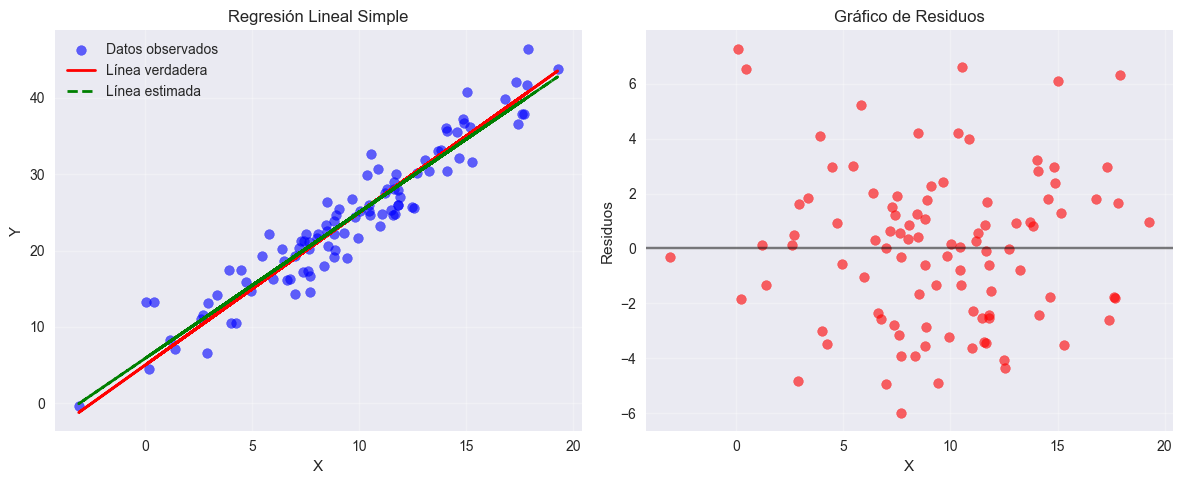

In [4]:
# Visualización de la regresión simple
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, Y, alpha=0.6, color='blue', label='Datos observados')
plt.plot(X, beta_0_true + beta_1_true * X, 'r-', linewidth=2, label='Línea verdadera')
plt.plot(X, beta_0_hat + beta_1_hat * X, 'g--', linewidth=2, label='Línea estimada')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuos = Y - (beta_0_hat + beta_1_hat * X)
plt.scatter(X, residuos, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2️⃣ Regresión Lineal Múltiple (Dos Regresores)

Ahora consideramos el modelo con dos regresores:
$$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + u_i$$

Los estimadores son:
- $\hat{\beta}_1 = \frac{S_{1Y}S_{22} - S_{2Y}S_{12}}{S_{11}S_{22} - S_{12}^2}$
- $\hat{\beta}_2 = \frac{S_{2Y}S_{11} - S_{1Y}S_{12}}{S_{11}S_{22} - S_{12}^2}$
- $\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1\bar{X}_1 - \hat{\beta}_2\bar{X}_2$

In [18]:
# Parámetros poblacionales verdaderos para regresión múltiple
beta_0_true = 3
beta_1_true = 1.5
beta_2_true = -0.8
sigma_true = 9
n=1000

print("2️⃣ REGRESIÓN LINEAL MÚLTIPLE (DOS REGRESORES)")
print("-" * 50)

2️⃣ REGRESIÓN LINEAL MÚLTIPLE (DOS REGRESORES)
--------------------------------------------------


In [ ]:
# Generar regresores correlacionados
np.random.seed(123)
mean_X = [10, 15]
cov_X = [[25, 15], [15, 20]]  # Correlación positiva entre X1 y X2
X_mult = np.random.multivariate_normal(mean_X, cov_X, n)
X1 = X_mult[:, 0]
X2 = X_mult[:, 1]

# Variable dependiente
u = np.random.normal(0, sigma_true, n)
Y_mult = beta_0_true + beta_1_true * X1 + beta_2_true * X2 + u

print(f"Correlación entre X1 y X2: {np.corrcoef(X1, X2)[0,1]:.3f}")

Correlación entre X1 y X2: 0.640


In [25]:
# Calcular estimadores manualmente usando fórmulas derivadas
X1_mean = np.mean(X1)
X2_mean = np.mean(X2)
Y_mult_mean = np.mean(Y_mult)

# Sumas de cuadrados y productos cruzados
S11 = np.sum((X1 - X1_mean)**2)
S22 = np.sum((X2 - X2_mean)**2)
S12 = np.sum((X1 - X1_mean) * (X2 - X2_mean))
S1Y = np.sum((X1 - X1_mean) * (Y_mult - Y_mult_mean))
S2Y = np.sum((X2 - X2_mean) * (Y_mult - Y_mult_mean))

# Estimadores de las pendientes
denominador = S11 * S22 - S12**2
beta_1_hat_mult = (S1Y * S22 - S2Y * S12) / denominador
beta_2_hat_mult = (S2Y * S11 - S1Y * S12) / denominador
beta_0_hat_mult = Y_mult_mean - beta_1_hat_mult * X1_mean - beta_2_hat_mult * X2_mean

print(f"\nCálculo Manual:")
print(f"Parámetros verdaderos: β₀ = {beta_0_true}, β₁ = {beta_1_true}, β₂ = {beta_2_true}")
print(f"Estimadores MCO:       β̂₀ = {beta_0_hat_mult:.3f}, β̂₁ = {beta_1_hat_mult:.3f}, β̂₂ = {beta_2_hat_mult:.3f}")


Cálculo Manual:
Parámetros verdaderos: β₀ = 3, β₁ = 1.5, β₂ = -0.8
Estimadores MCO:       β̂₀ = 3.456, β̂₁ = 1.432, β̂₂ = -0.783


In [26]:
# Método matricial
X_matrix = np.column_stack([np.ones(n), X1, X2])
XtX = X_matrix.T @ X_matrix
XtY = X_matrix.T @ Y_mult
beta_hat_matrix = np.linalg.inv(XtX) @ XtY

print(f"Método Matricial:")
print(f"β̂ = [{beta_hat_matrix[0]:.3f}, {beta_hat_matrix[1]:.3f}, {beta_hat_matrix[2]:.3f}]")

# Verificación con sklearn
X_sklearn = np.column_stack([X1, X2])
model_mult = LinearRegression().fit(X_sklearn, Y_mult)
print(f"\nVerificación sklearn:")
print(f"β̂₀ = {model_mult.intercept_:.3f}, β̂₁ = {model_mult.coef_[0]:.3f}, β̂₂ = {model_mult.coef_[1]:.3f}")

print(f"\nMatriz X'X:")
print(XtX)
print(f"\nVector X'Y:")
print(XtY)

Método Matricial:
β̂ = [3.456, 1.432, -0.783]

Verificación sklearn:
β̂₀ = 3.456, β̂₁ = 1.432, β̂₂ = -0.783

Matriz X'X:
[[  1000.           9745.04270779  14985.6968996 ]
 [  9745.04270779 118422.00484989 159506.77413339]
 [ 14985.6968996  159506.77413339 243452.36876786]]

Vector X'Y:
[ 5681.514473   78412.57771487 89653.03779034]


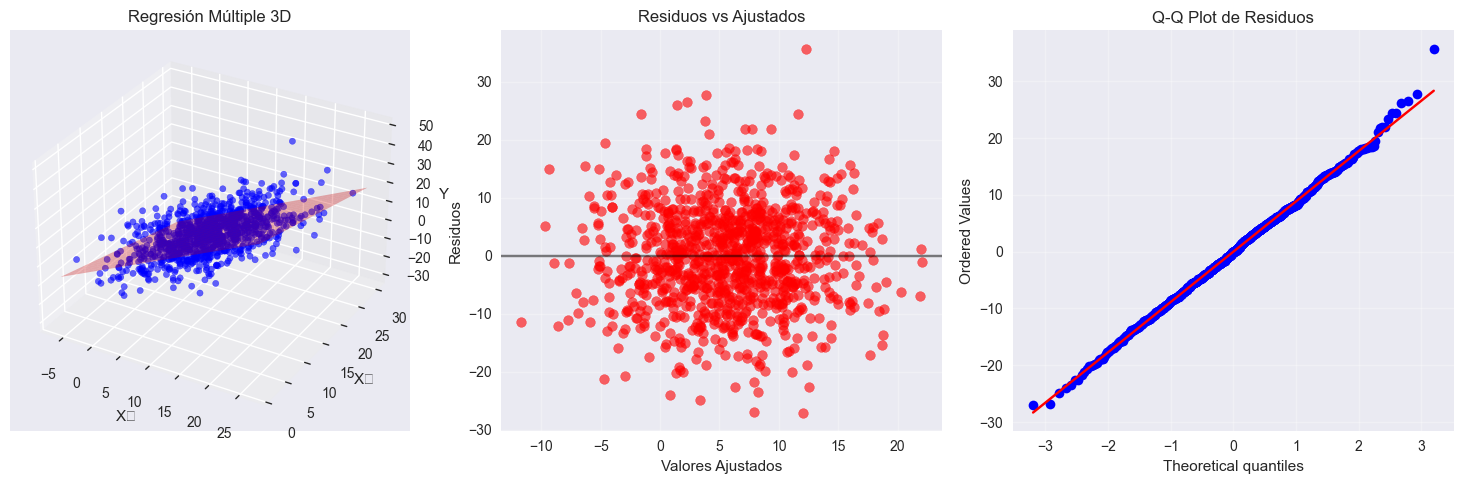

In [27]:
# Visualización 3D de la regresión múltiple
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# Gráfico 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X1, X2, Y_mult, alpha=0.6, color='blue')

# Crear superficie de regresión
x1_range = np.linspace(X1.min(), X1.max(), 20)
x2_range = np.linspace(X2.min(), X2.max(), 20)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
Y_grid = beta_0_hat_mult + beta_1_hat_mult * X1_grid + beta_2_hat_mult * X2_grid

ax1.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.3, color='red')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('Y')
ax1.set_title('Regresión Múltiple 3D')

# Residuos vs valores ajustados
ax2 = fig.add_subplot(132)
Y_pred = beta_0_hat_mult + beta_1_hat_mult * X1 + beta_2_hat_mult * X2
residuos_mult = Y_mult - Y_pred
ax2.scatter(Y_pred, residuos_mult, alpha=0.6, color='red')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_xlabel('Valores Ajustados')
ax2.set_ylabel('Residuos')
ax2.set_title('Residuos vs Ajustados')
ax2.grid(True, alpha=0.3)

# QQ plot de residuos
ax3 = fig.add_subplot(133)
stats.probplot(residuos_mult, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot de Residuos')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3️⃣ Comparación: Simple vs Múltiple

Aquí demostramos el **sesgo por variable omitida**. Cuando omitimos una variable relevante en la regresión, los estimadores pueden estar sesgados.

In [28]:
print("3️⃣ COMPARACIÓN: SIMPLE vs MÚLTIPLE")
print("-" * 40)

# Regresión simple de Y sobre X1 solamente
beta_1_simple_X1 = np.sum((X1 - X1_mean) * (Y_mult - Y_mult_mean)) / np.sum((X1 - X1_mean)**2)
beta_0_simple_X1 = Y_mult_mean - beta_1_simple_X1 * X1_mean

# Regresión simple de Y sobre X2 solamente  
beta_1_simple_X2 = np.sum((X2 - X2_mean) * (Y_mult - Y_mult_mean)) / np.sum((X2 - X2_mean)**2)
beta_0_simple_X2 = Y_mult_mean - beta_1_simple_X2 * X2_mean

print(f"Regresión Y = β₀ + β₁X₁:")
print(f"  β̂₁ = {beta_1_simple_X1:.3f} (verdadero: {beta_1_true})")
print(f"  Sesgo = {beta_1_simple_X1 - beta_1_true:.3f}")

print(f"\nRegresión Y = β₀ + β₂X₂:")
print(f"  β̂₂ = {beta_1_simple_X2:.3f} (verdadero: {beta_2_true})")
print(f"  Sesgo = {beta_1_simple_X2 - beta_2_true:.3f}")

print(f"\nRegresión múltiple Y = β₀ + β₁X₁ + β₂X₂:")
print(f"  β̂₁ = {beta_1_hat_mult:.3f} (verdadero: {beta_1_true})")
print(f"  β̂₂ = {beta_2_hat_mult:.3f} (verdadero: {beta_2_true})")
print(f"  Sesgo β₁ = {beta_1_hat_mult - beta_1_true:.3f}")
print(f"  Sesgo β₂ = {beta_2_hat_mult - beta_2_true:.3f}")

3️⃣ COMPARACIÓN: SIMPLE vs MÚLTIPLE
----------------------------------------
Regresión Y = β₀ + β₁X₁:
  β̂₁ = 0.983 (verdadero: 1.5)
  Sesgo = -0.517

Regresión Y = β₀ + β₂X₂:
  β̂₂ = 0.239 (verdadero: -0.8)
  Sesgo = 1.039

Regresión múltiple Y = β₀ + β₁X₁ + β₂X₂:
  β̂₁ = 1.432 (verdadero: 1.5)
  β̂₂ = -0.783 (verdadero: -0.8)
  Sesgo β₁ = -0.068
  Sesgo β₂ = 0.017


## 4️⃣ Simulación Monte Carlo

Realizamos múltiples simulaciones para estudiar las **propiedades estadísticas** de los estimadores:
- Insesgadez: $E[\hat{\beta}] = \beta$
- Distribución de los estimadores